In [1]:
from numpy import asarray
from numpy import savetxt
import pickle
import csv

#Import funcions
from fuctionscorr import plotbar_info
from fuctionscorr import calcul
from fuctionscorr import plotbar_info_rac

In [2]:
#Feature_array_EC_norm = Eyes closed normalised features
#Feature_array_EO_norm = Eyes open normalised features
#Feature_array_EC_no_norm = Eyes closed raw features
#Feature_array_EO_no_norm = Eyes open raw features

with open("/Users/laianavarroolivella/Proyectos/EEG/5.EEGAllChanels/Features/Feature_array_EC_no_norm.p", "rb") as fp:   # Unpickling
    Feature_array_EC_norm = pickle.load(fp)
with open("/Users/laianavarroolivella/Proyectos/EEG/5.EEGAllChanels/Features/Feature_array_EO_no_norm.p", "rb") as fp:   # Unpickling
    Feature_array_EO_norm = pickle.load(fp)

with open("/Users/laianavarroolivella/Proyectos/EEG/5.EEGAllChanels/Features/Sub_idx_EC", "rb") as fp:   # Unpickling
    Sub_idx_EC = pickle.load(fp)
with open("/Users/laianavarroolivella/Proyectos/EEG/5.EEGAllChanels/Features/Sub_idx_EO", "rb") as fp:   # Unpickling
    Sub_idx_EO = pickle.load(fp)
with open("/Users/laianavarroolivella/Proyectos/EEG/1.create12ChanelsXPatient/sorted_list_ECsave.txt", "rb") as fp:   # Unpickling
    originalPatients = pickle.load(fp)


In [3]:
#Import the data to analise
#Open the file in universal line ending mode 
with open('/Users/laianavarroolivella/Proyectos/EEG/Files_EEG/TEIQue-SF.csv', 'rU') as infile:
  # read the file as a dictionary for each row ({header : value})
  data = {}
  reader = csv.DictReader(infile)
  for row in reader:
    for header, value in row.items():
      try:
        data[header].append(value)
      except KeyError:
        data[header] = [value]

# extract the variables you want
names = data['ID']
TeiQueSF_emotionality = data['TeiQueSF_emotionality']
TeiQueSF_wellBeing = data['TeiQueSF_well_being']

In [4]:
Names= []
for i in Sub_idx_EC:
    hename = originalPatients[int(i)]   #Select the name of the patient
    hename = str(hename[:-7])  #Select only the number witout the extension 
    Names.append(hename) #Add it in to the xCorr

In [5]:
len(Feature_array_EC_norm[1])

3

Emotionality EO


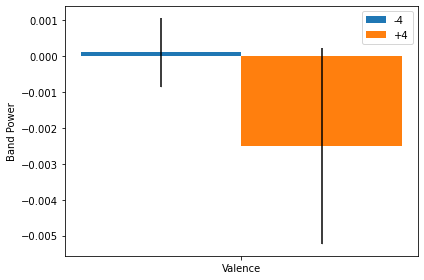

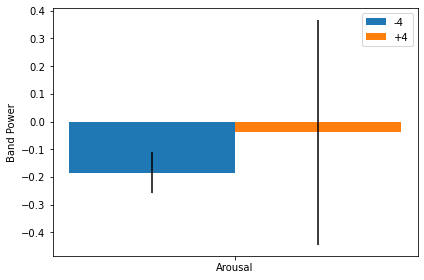

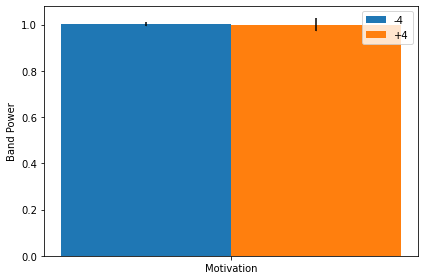

Max corr Emotionality EO:  [[-0.002504835783730357, -0.03801421199069005, 0.9995379216635398]]
Well EO


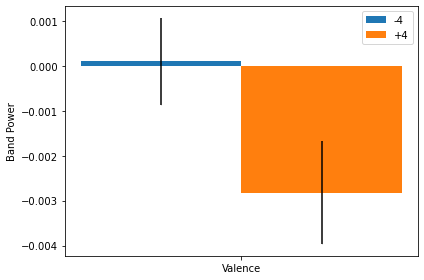

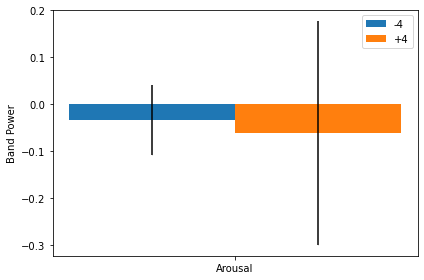

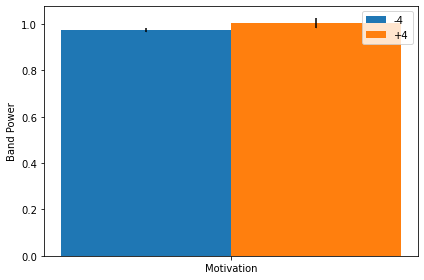

Max corr Well EO:  [[-0.0028232875265309654, -0.06043879783358619, 1.0038930486158315]]
Emotionality EC


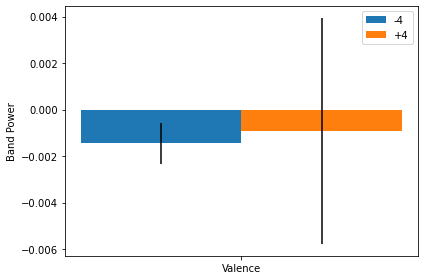

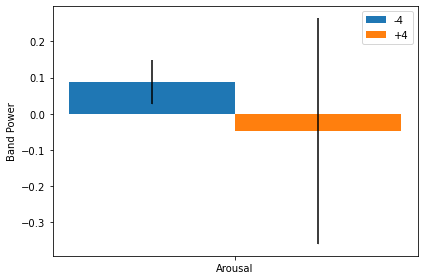

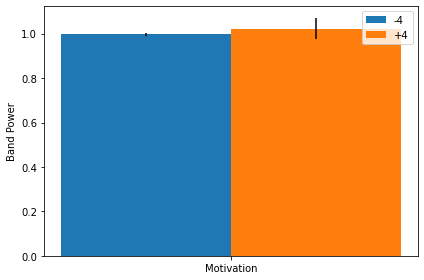

Max corr Emotionality EC:  [[-0.0009246605687909583, -0.04768939071404761, 1.0231080106435524]]
Well EC


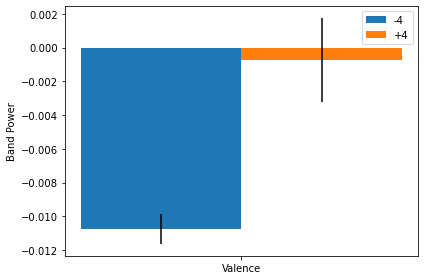

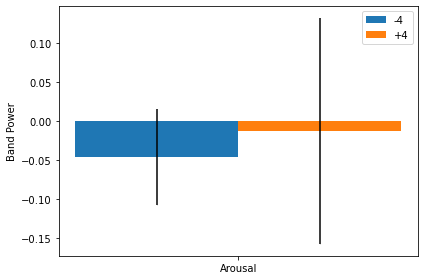

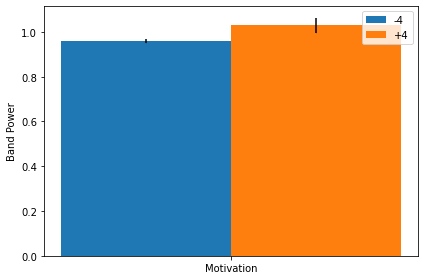

Max corr Well EC:  [[-0.0007310669155429911, -0.012491234991666766, 1.0291185360768893]]


In [6]:
#
bandPower_emotio_EO = []
bandPower_well_EO = []
bandPower_emotio_EC = []
bandPower_well_EC = []

print('Emotionality EO')
band_emotio = plotbar_info(names, Names, TeiQueSF_emotionality, Feature_array_EO_norm)
bandPower_emotio_EO.append(band_emotio)
print('Max corr Emotionality EO: ', bandPower_emotio_EO)

print('Well EO')
band_well = plotbar_info(names, Names, TeiQueSF_wellBeing, Feature_array_EO_norm)
bandPower_well_EO.append(band_well)
print('Max corr Well EO: ', bandPower_well_EO)

print('Emotionality EC')
band_emotio = plotbar_info(names, Names, TeiQueSF_emotionality, Feature_array_EC_norm)
bandPower_emotio_EC.append(band_emotio)
print('Max corr Emotionality EC: ', bandPower_emotio_EC)

print('Well EC')
band_well = plotbar_info(names, Names, TeiQueSF_wellBeing, Feature_array_EC_norm)
bandPower_well_EC.append(band_well)
print('Max corr Well EC: ', bandPower_well_EC)

Emotionality EO


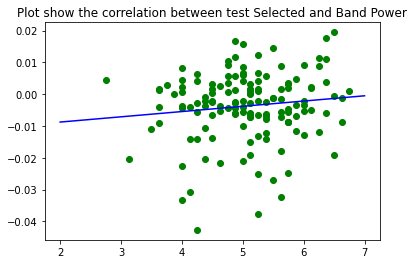

(0.1217502712507636, 0.15037979463260479)


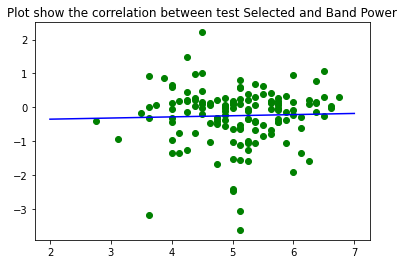

(0.032161429022432665, 0.7049891633268758)


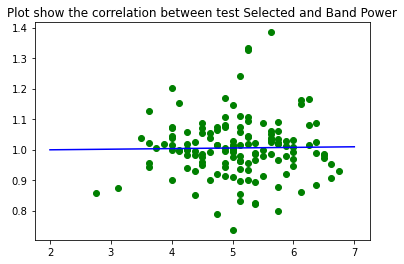

(0.01627718846815461, 0.8480766313611584)
Emotionality EC


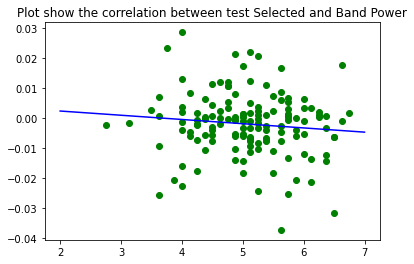

(-0.10685542701130292, 0.2072521594680805)


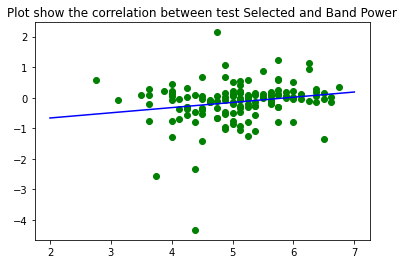

(0.1977663166929112, 0.018737759369453433)


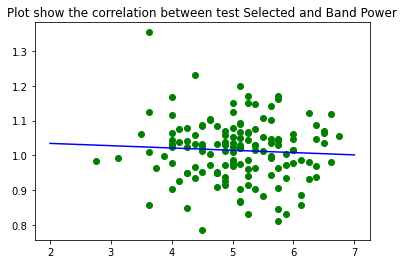

(-0.0596050023308557, 0.4826202518450471)
Well EO


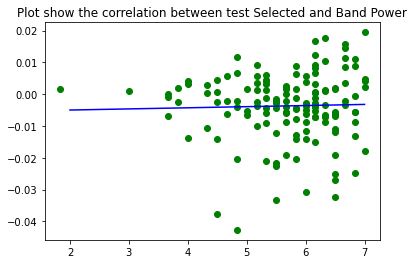

(0.02987707197255732, 0.7250699550642252)


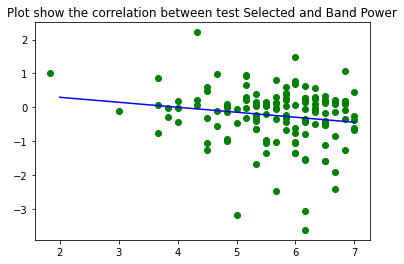

(-0.16072130635341955, 0.05692743753877419)


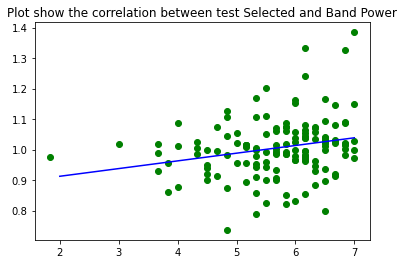

(0.23751697304217265, 0.004568928880675383)
Well EC


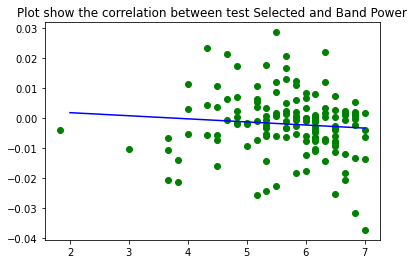

(-0.08960463364011748, 0.2906704563754932)


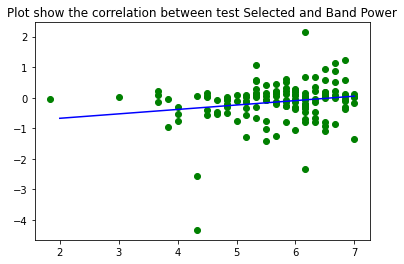

(0.19327015578931048, 0.021663229417717766)


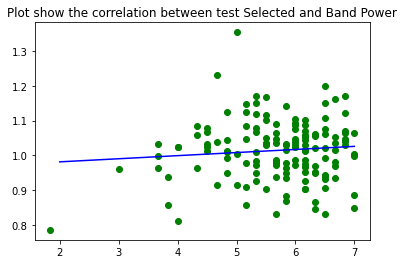

(0.09217284281017289, 0.27700804724617184)


In [7]:
save_corr = []
print('Emotionality EO')
cor = calcul(names, Names, TeiQueSF_emotionality, Feature_array_EO_norm, 2, 7)
save_corr.append(cor)

print('Emotionality EC')
cor = calcul(names, Names, TeiQueSF_emotionality, Feature_array_EC_norm, 2, 7)
save_corr.append(cor)

print('Well EO')
cor = calcul(names, Names, TeiQueSF_wellBeing, Feature_array_EO_norm, 2, 7)
save_corr.append(cor)

print('Well EC')
cor = calcul(names, Names, TeiQueSF_wellBeing, Feature_array_EC_norm, 2, 7)
save_corr.append(cor)

In [8]:
resu = []
print('Emotionality EO')
EOE = plotbar_info_rac(names, Names, TeiQueSF_emotionality, Feature_array_EO_norm)
resu.append(EOE)

print('Emotionality EC')
ECE = plotbar_info_rac(names, Names, TeiQueSF_emotionality, Feature_array_EC_norm)
save_corr.append(ECE)

print('Well EO')
EOW = plotbar_info_rac(names, Names, TeiQueSF_wellBeing, Feature_array_EO_norm)
resu.append(EOW)

print('Well EC')
ECW = plotbar_info_rac(names, Names, TeiQueSF_wellBeing, Feature_array_EC_norm)
resu.append(ECW)

Emotionality EO
Valence
RanksumsResult(statistic=-0.08957898279306957, pvalue=0.9286217865502948)
Arousal
RanksumsResult(statistic=-0.17915796558613914, pvalue=0.8578136682536458)
Motivation
RanksumsResult(statistic=-0.5374738967584174, pvalue=0.590940311049537)
Emotionality EC
Valence
RanksumsResult(statistic=-0.0627052879551487, pvalue=0.9500011865034849)
Arousal
RanksumsResult(statistic=0.5016423036411896, pvalue=0.6159191562938688)
Motivation
RanksumsResult(statistic=0.10749477935168349, pvalue=0.9143964667999676)
Well EO
Valence
RanksumsResult(statistic=0.7228610559405753, pvalue=0.46976525172882255)
Arousal
RanksumsResult(statistic=0.7907808867000924, pvalue=0.42907186527586016)
Motivation
RanksumsResult(statistic=-1.4505735283639731, pvalue=0.1468986509424726)
Well EC
Valence
RanksumsResult(statistic=-3.0903522995580297, pvalue=0.001999192092693202)
Arousal
RanksumsResult(statistic=-0.0727712472423398, pvalue=0.941988151651388)
Motivation
RanksumsResult(statistic=-2.430559657894

In [9]:
import numpy as np
np.mean(Feature_array_EC_norm)

0.2902819230144731